<a href="https://colab.research.google.com/github/Ankushxc77/Ankster-s-Repository/blob/main/Internship_Problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web

In [2]:
data = pd.read_csv("/content/TATAMOTORS.NS.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-16,311.100006,315.450012,310.500000,311.250000,311.250000,25148606
1,2021-07-19,308.950012,310.299988,306.000000,308.850006,308.850006,21346348
2,2021-07-20,307.000000,308.000000,301.049988,302.149994,302.149994,27672567
3,2021-07-22,305.500000,307.450012,301.049988,302.549988,302.549988,21338361
4,2021-07-23,300.500000,301.899994,295.000000,295.549988,295.549988,33435130
...,...,...,...,...,...,...,...
244,2022-07-11,438.049988,441.200012,433.450012,437.049988,437.049988,12619654
245,2022-07-12,433.000000,435.000000,428.149994,430.549988,430.549988,9518822
246,2022-07-13,432.700012,435.850006,425.649994,427.100006,427.100006,10181698
247,2022-07-14,428.000000,431.250000,423.299988,428.049988,428.049988,10744547


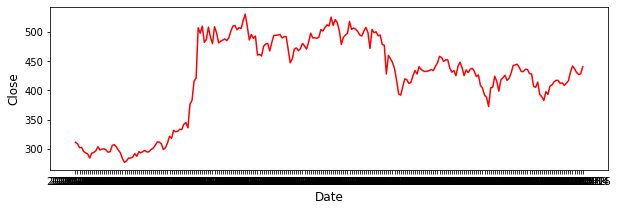

In [3]:
plt.figure(figsize=(10,3))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.plot(data.Date, data.Close,color='red')

In [4]:
# 1. Filter out the closing market price data
close_data = data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=10)

Epoch 1/10
115/115 [==============================] - 12s 49ms/step - loss: 0.0364
Epoch 2/10
115/115 [==============================] - 6s 54ms/step - loss: 0.0143
Epoch 3/10
115/115 [==============================] - 5s 41ms/step - loss: 0.0112
Epoch 4/10
115/115 [==============================] - 3s 27ms/step - loss: 0.0088
Epoch 5/10
115/115 [==============================] - 3s 30ms/step - loss: 0.0083
Epoch 6/10
115/115 [==============================] - 3s 25ms/step - loss: 0.0080
Epoch 7/10
115/115 [==============================] - 3s 26ms/step - loss: 0.0092
Epoch 8/10
115/115 [==============================] - 3s 26ms/step - loss: 0.0079
Epoch 9/10
115/115 [==============================] - 3s 24ms/step - loss: 0.0068
Epoch 10/10
115/115 [==============================] - 3s 24ms/step - loss: 0.0077


In [7]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


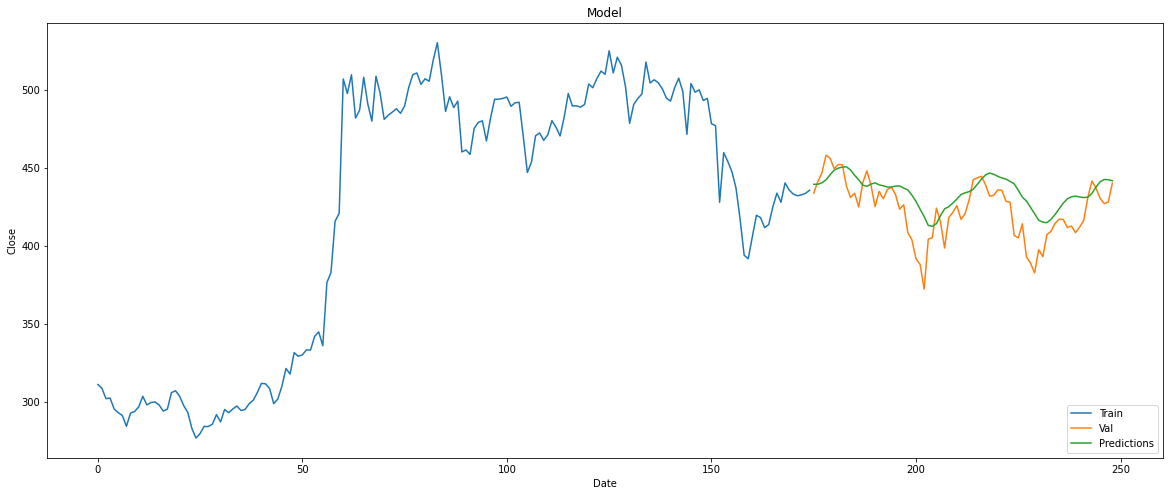

In [8]:
train = data[:training_data_len]
valid = data[training_data_len:]
 
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [9]:
table = pd.DataFrame(data=valid, columns=['Close','Predictions'])
table

,Close,Predictions
175,433.750000,439.446228
176,441.149994,439.461456
177,446.750000,440.402069
178,458.049988,442.240387
179,456.149994,445.578247
...,...,...
244,437.049988,437.679352
245,430.549988,441.023590
246,427.100006,442.510712
247,428.049988,442.425049
